In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diamonds.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [4]:
ndf = pd.get_dummies(df, drop_first=True)
ndf.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
3,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
5,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [5]:
ndf['volume'] = ndf.x * ndf.y * ndf.z
ndf.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,volume
1,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,True,False,False,False,False,38.202030
2,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,True,False,False,False,False,False,34.505856
3,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,True,False,False,False,38.076885
4,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,True,False,False,False,False,False,True,False,False,46.724580
5,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,True,False,False,True,False,False,False,False,51.917250


In [6]:
X, y = ndf.drop('price', axis=1), ndf['price']
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,volume
1,0.23,61.5,55.0,3.95,3.98,2.43,False,True,False,False,...,False,False,False,False,True,False,False,False,False,38.202030
2,0.21,59.8,61.0,3.89,3.84,2.31,False,False,True,False,...,False,False,False,True,False,False,False,False,False,34.505856
3,0.23,56.9,65.0,4.05,4.07,2.31,True,False,False,False,...,False,False,False,False,False,True,False,False,False,38.076885
4,0.29,62.4,58.0,4.20,4.23,2.63,False,False,True,False,...,True,False,False,False,False,False,True,False,False,46.724580
5,0.31,63.3,58.0,4.34,4.35,2.75,True,False,False,False,...,False,True,False,False,True,False,False,False,False,51.917250


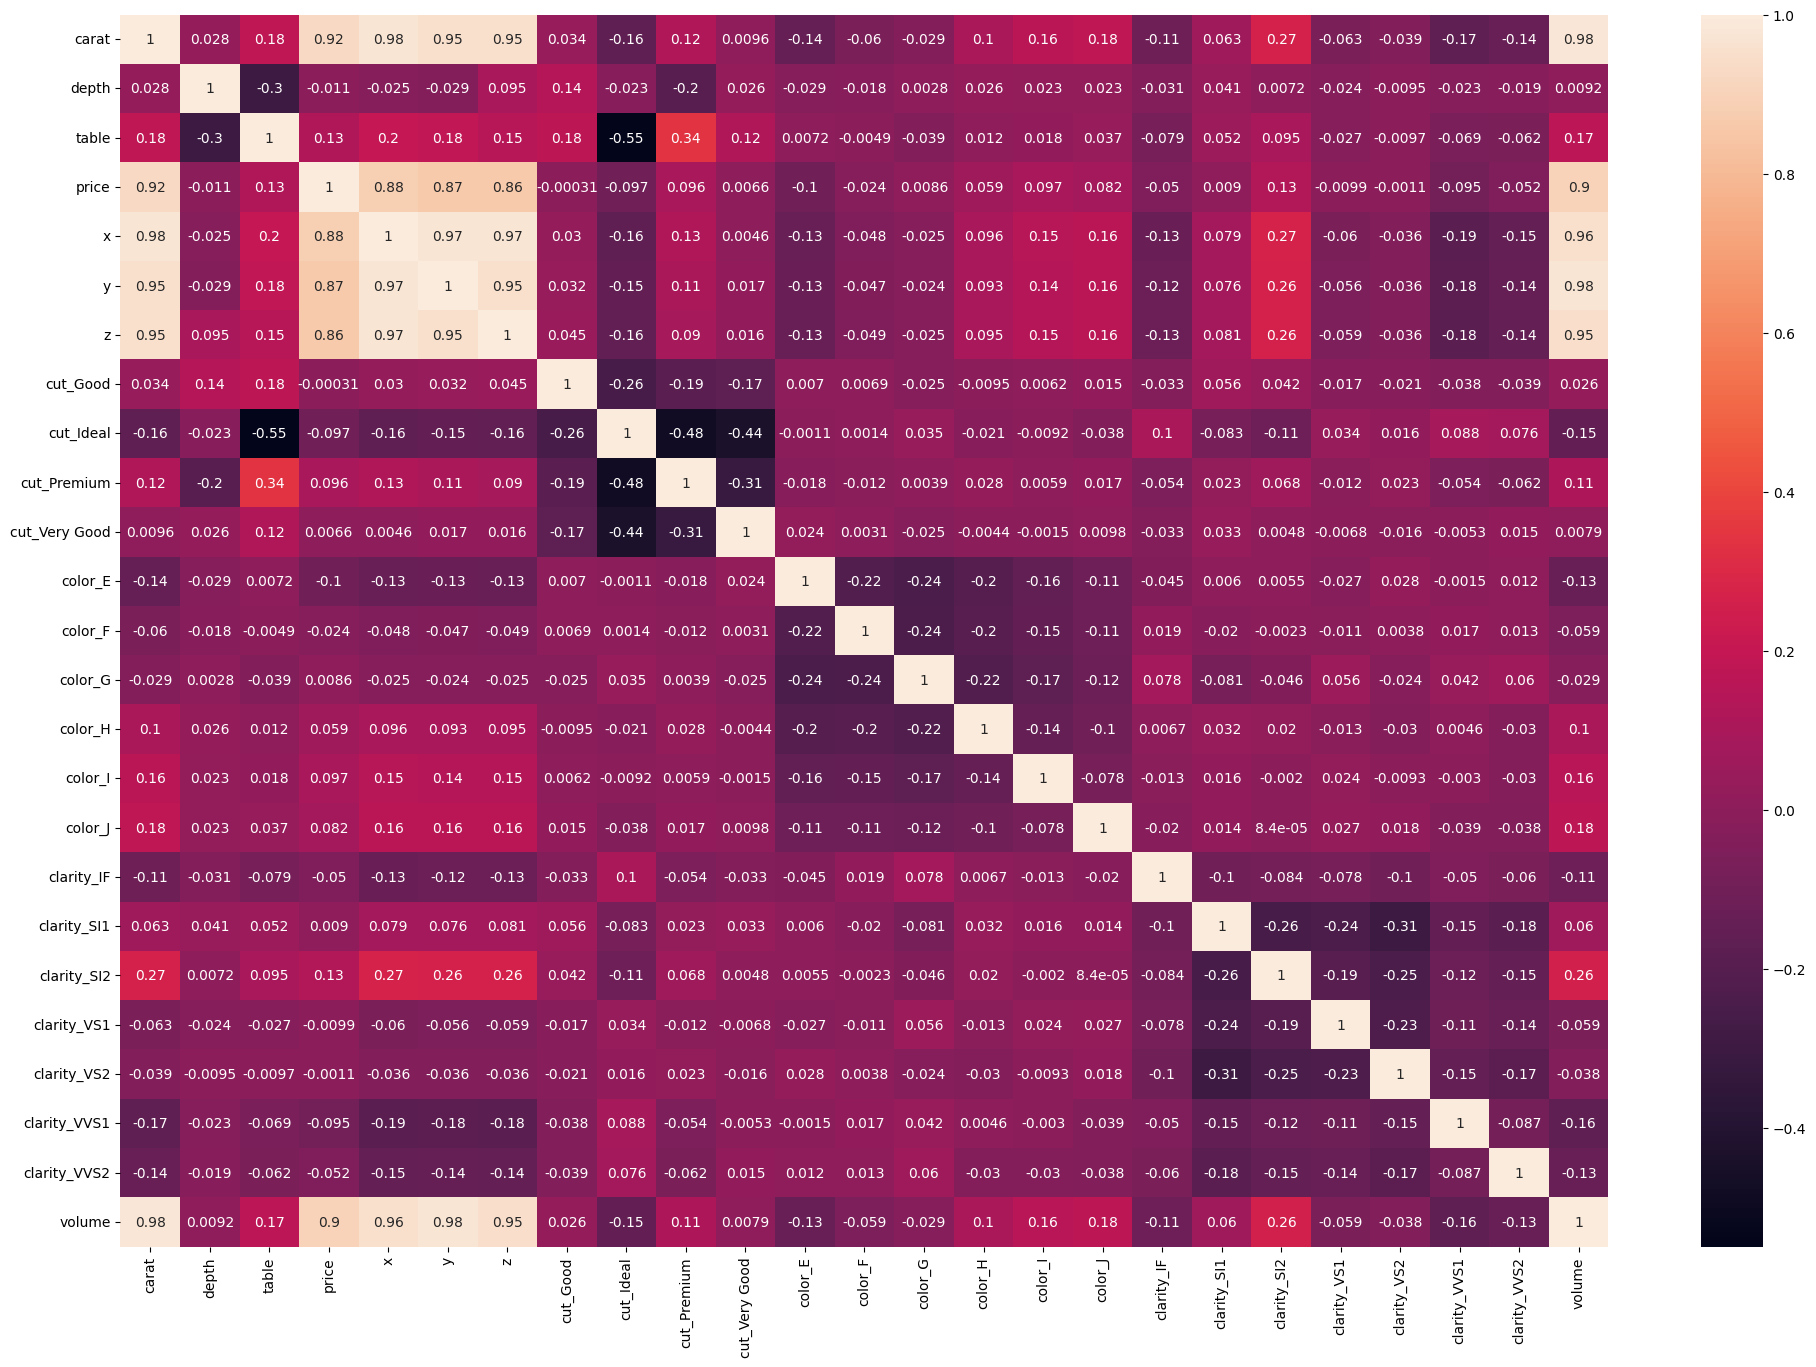

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(24, 16))
sns.heatmap(ndf.corr(), annot=True)
plt.show()

In [8]:
X = X.drop(columns=['x', 'y', 'z'])
X.head()

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,volume
1,0.23,61.5,55.0,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,38.202030
2,0.21,59.8,61.0,False,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,34.505856
3,0.23,56.9,65.0,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,38.076885
4,0.29,62.4,58.0,False,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,False,46.724580
5,0.31,63.3,58.0,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,51.917250


In [9]:
from sklearn.model_selection import train_test_split


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=27)

In [10]:
from sklearn.preprocessing import StandardScaler


Xtrain = pd.DataFrame(StandardScaler().fit_transform(Xtrain), columns=Xtrain.columns)
Xtest = pd.DataFrame(StandardScaler().fit_transform(Xtest), columns=Xtest.columns)

In [11]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(Xtrain, ytrain)
pred_lr = lr.predict(Xtest)
lr.coef_

array([4179.28092024,  -23.35883223,  -52.33697615,  164.15105074,
        413.23211444,  334.36415354,  314.54425461,  -80.43292665,
       -116.24082524, -208.20084979, -350.77958703, -436.17937626,
       -517.73355882,  957.77979495, 1480.83673519,  954.01093166,
       1591.03865587, 1726.45217145, 1249.83796987, 1413.86836979,
         46.57638726])

In [12]:
from sklearn.metrics import mean_squared_error


print(mean_squared_error(ytest, pred_lr) ** 0.5)

1168.469837618739


In [13]:
lr.score(Xtest, ytest)

0.9131476642556807